In [ ]:
!pip install seaborn
!pip install scikit-learn

# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data_url = 'CarPrice_Assignment.csv'
data = pd.read_csv(data_url)

# **Exploratory Data Analysis**

In [ ]:
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
# Check for missing values
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

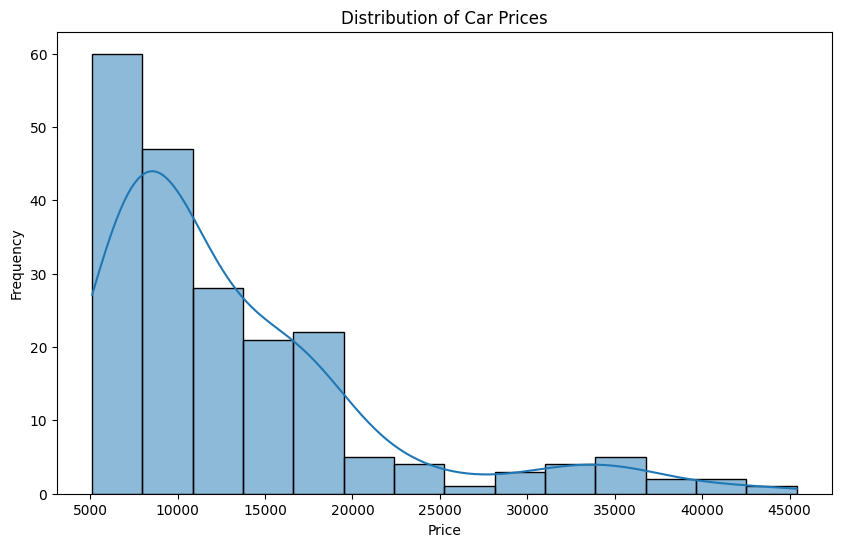

In [ ]:
# Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

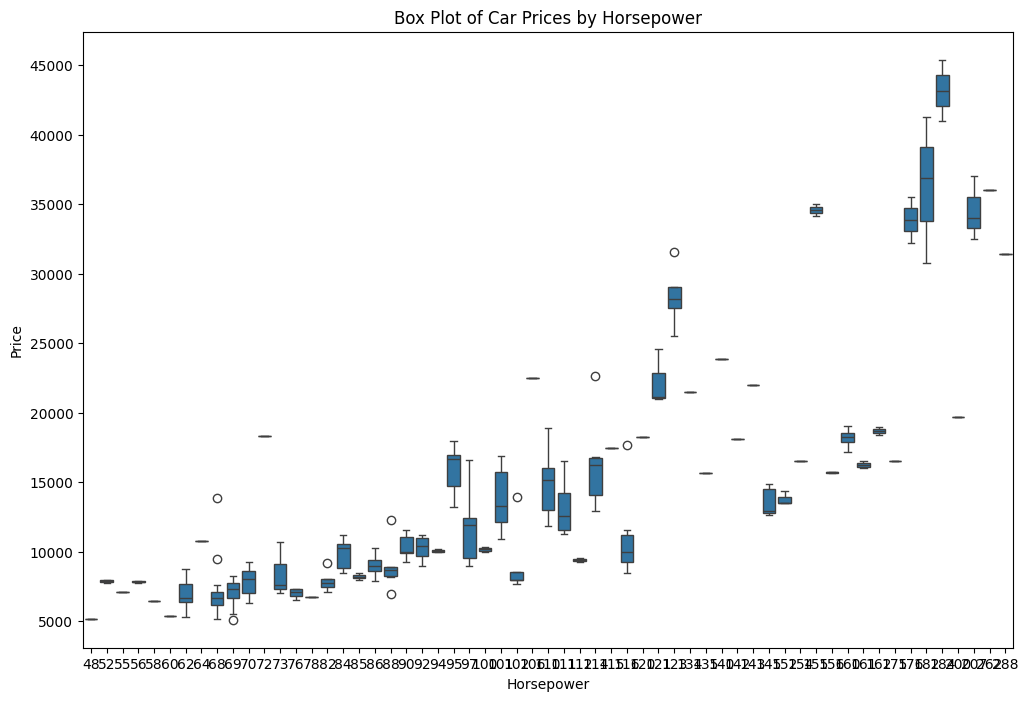

In [ ]:
# Box Plot of Car Prices by Horespower
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='horsepower', y='price')
plt.title('Box Plot of Car Prices by Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

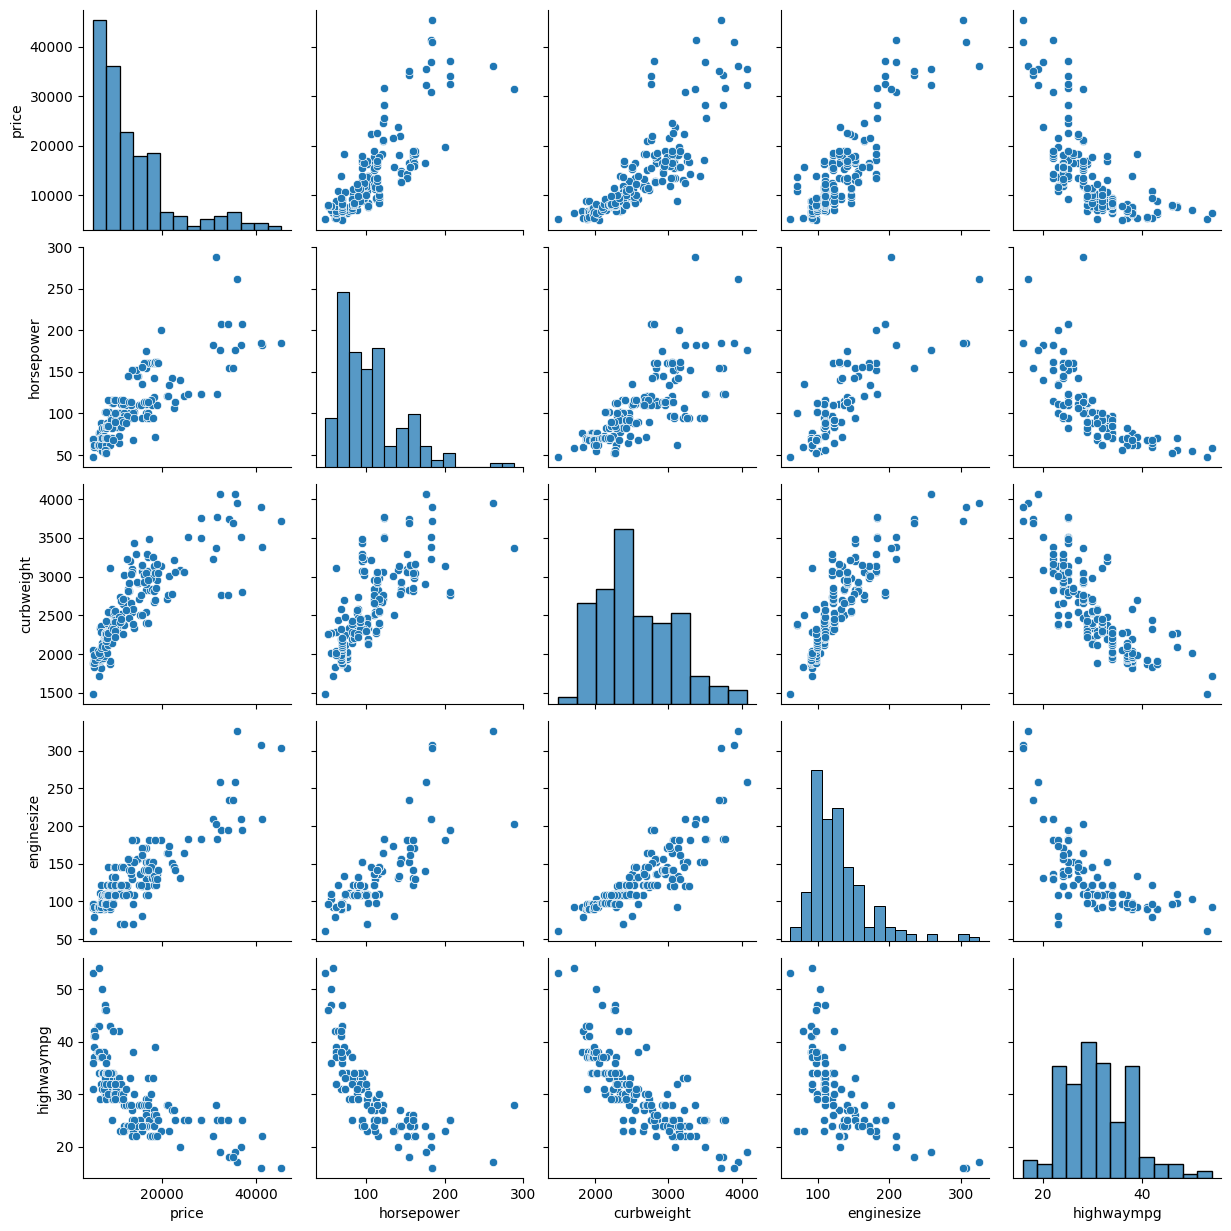

In [ ]:
# Pairplot of Selected Features
selected_features = ['price', 'horsepower', 'curbweight', 'enginesize', 'highwaympg']
sns.pairplot(data[selected_features])
plt.show()

# **Machine Learning Techniques**

In [ ]:
# Selecting features and target variable
features = ['horsepower', 'curbweight', 'enginesize', 'highwaympg']
X = data[features]
y = data['price']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class from sklearn.preprocessing

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 2747.918007387287
Mean Squared Error (MSE): 14367324.98366228
Root Mean Squared Error (RMSE): 3790.425435708013


# **Data Visualization Techniques**

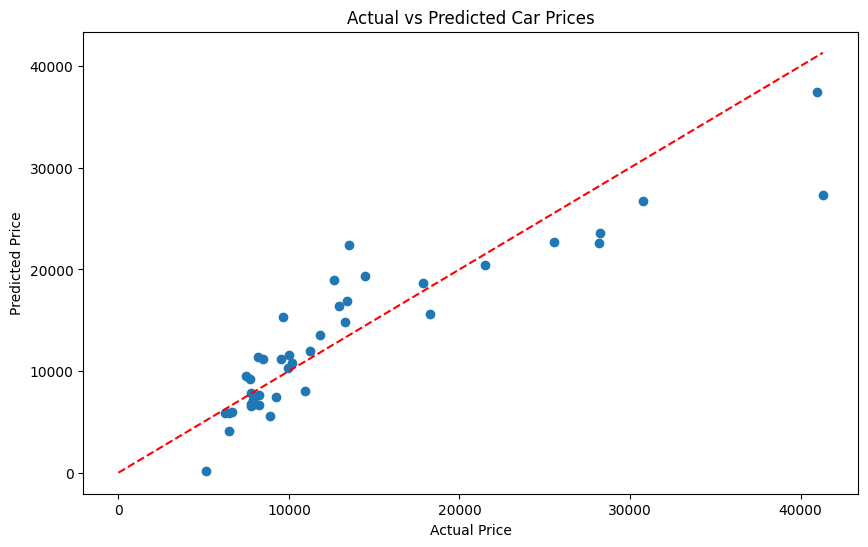

In [ ]:
  # Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], '--r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

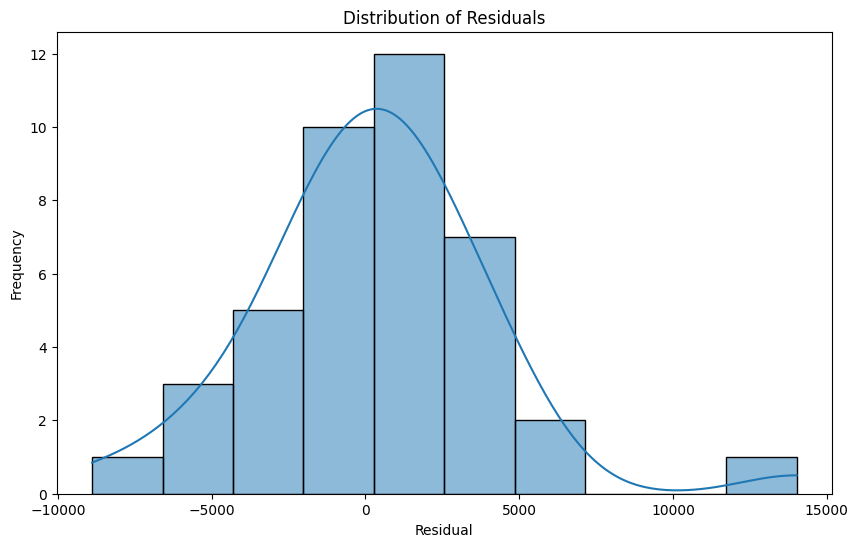

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

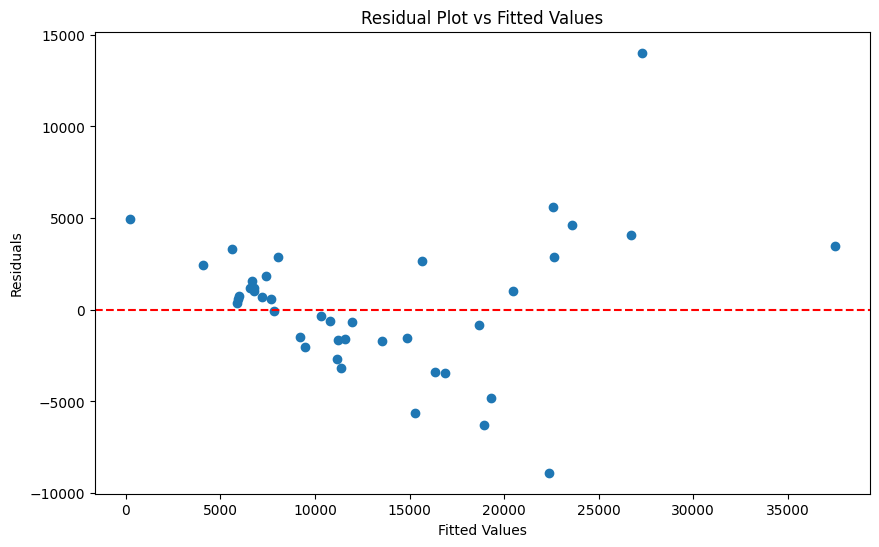

In [ ]:
# Calculate residuals
residuals = y_test - y_pred
# Residual Plot vs Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot vs Fitted Values')
plt.show()


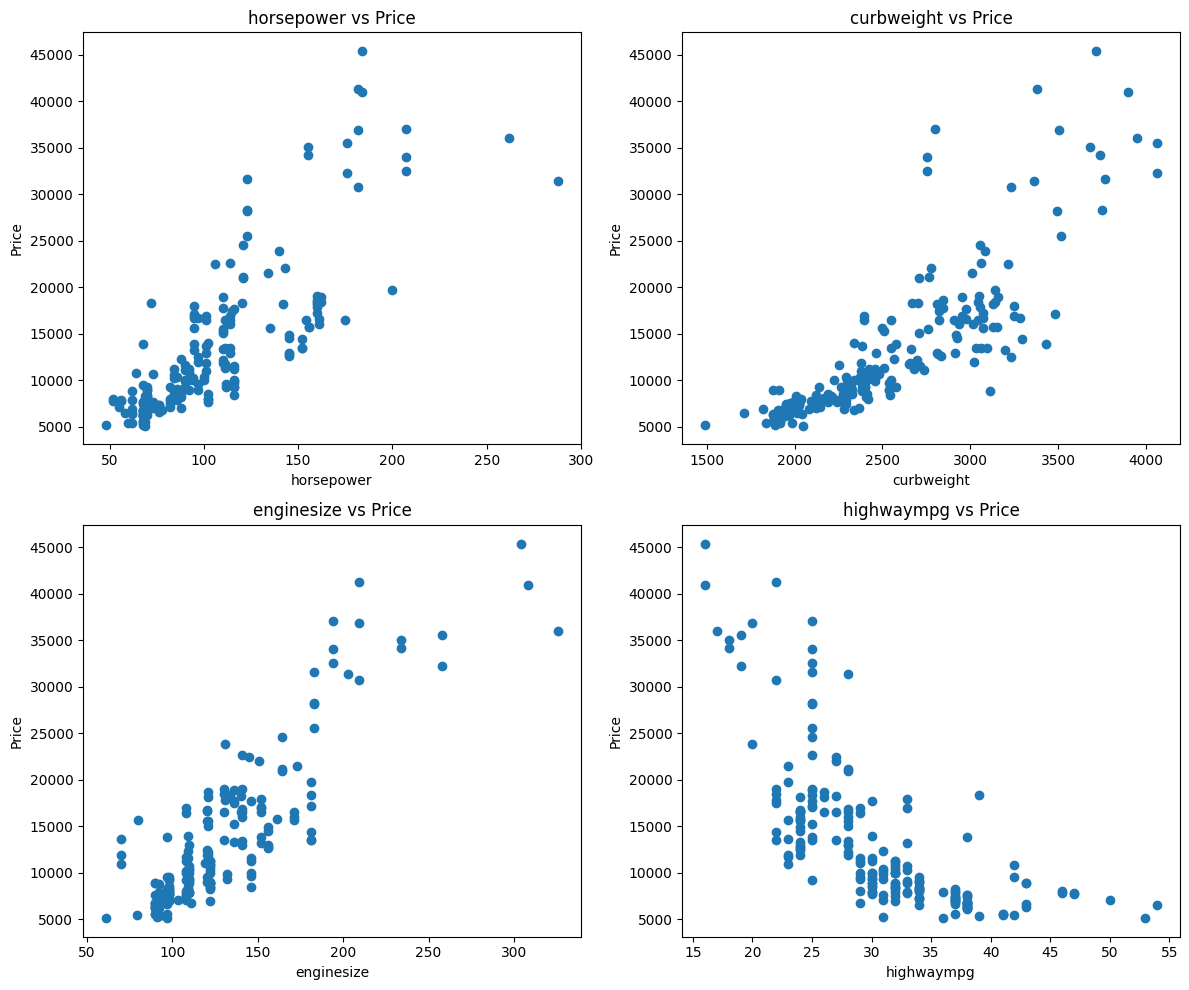

In [ ]:
# Feature vs Target Scatter Plots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(data[feature], data['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price')
plt.tight_layout()
plt.show()


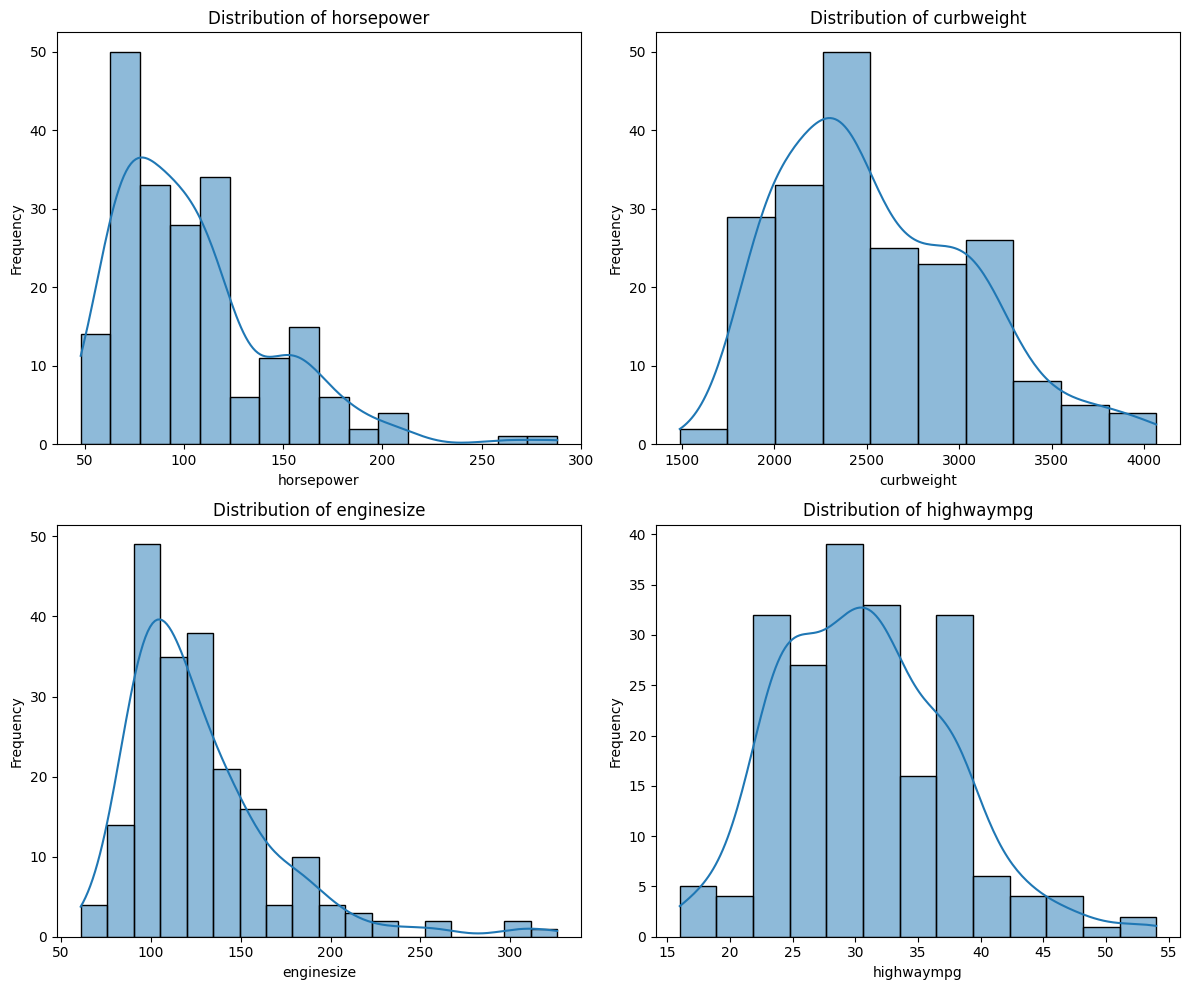

In [ ]:
# Distribution of Each Feature
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<ipython-input-36-aa72959af28e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='viridis')


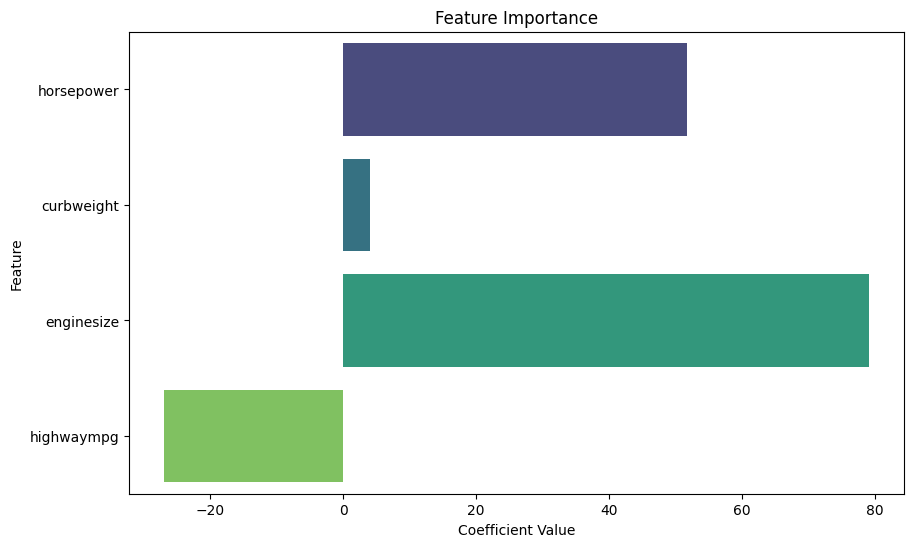

In [ ]:
# Feature importance
importance = model.coef_
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': importance})

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


# ***PRICE PREDICTION HERE***

In [ ]:
# Price predictor Function

def predict_price(horsepower, curbweight, enginesize, highwaympg):
    # Create a DataFrame with the input features
    input_data = pd.DataFrame([[horsepower, curbweight, enginesize, highwaympg]],
                              columns=['horsepower', 'curbweight', 'enginesize', 'highwaympg'])

    # Predict the price using the trained model
    predicted_price = model.predict(input_data)
    return predicted_price[0]

In [ ]:
# Usage:
predicted_price = predict_price(horsepower=150, curbweight=3000, enginesize=2.5, highwaympg=25)
print(f'Predicted Car Price: ${predicted_price:.2f}')

Predicted Car Price: $7706.75
